# **RICE CLASSIFICATION**

* **I Kadek Krisna Apriana Dwi Guna**

---





> Analisis ini bertujuan untuk melakukan klasifikasi terhadap 2 jenis beras yaitu jenis beras Gonen (kelas 0) dan Jasmine (kelas 1). Penjelasan kolom dalam dataset adalah sebagai berikut:

1. `Area`: Luas daerah biji beras.
2. `MajorAxisLength`: Panjang sumbu utama biji beras.
3. `MinorAxisLength`: Panjang sumbu minor biji beras.
4. `Eccentricity`: Ukuran seberapa "melengkung" atau "mendekati lingkaran" sebuah biji beras. Nilai 0 menunjukkan lingkaran sempurna, sedangkan nilai mendekati 1 menunjukkan elips yang sangat panjang.
5. `ConvexArea`:  Luas daerah yang dikelilingi oleh cangkang tertutup yang membungkus biji beras.
6. `EquivDiameter`: Diameter lingkaran yang memiliki luas yang sama dengan luas biji beras.
7. `Extent`: Rasio antara luas daerah biji beras dan luas kotak terkecil yang dapat menampung biji beras tersebut. Ini memberikan informasi tentang seberapa "tersebar" biji beras dalam citra.
8. `Perimeter`: Panjang keliling biji beras.
9. `Roundness`: Ukuran seberapa dekat biji beras dengan bentuk bulat sempurna. Nilai mendekati 1 menunjukkan bentuk yang lebih bulat.
10. `AspectRation`: Rasio antara panjang dan lebar biji beras. Nilai yang lebih besar dari 1 menunjukkan biji beras yang lebih panjang daripada lebarnya, dan sebaliknya.
11. `Class`: Label kelas atau kategori yang menunjukkan klasifikasi dari setiap biji beras berdasarkan fitur-fitur yang diukur. Pada dataset ini, 0 mewakili jenis beras Gonen sedangkan 1 mewakili jenis beras Jasmine.

## **Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

## **Import Dataset**



In [ ]:
df_ori = pd.read_csv('riceClassification.csv')

In [ ]:
df = df_ori.copy()
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


## **Data Preparation & Cleaning**

---



In [ ]:
df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [ ]:
df.drop('id', inplace=True, axis=1)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             18185 non-null  int64  
 1   MajorAxisLength  18185 non-null  float64
 2   MinorAxisLength  18185 non-null  float64
 3   Eccentricity     18185 non-null  float64
 4   ConvexArea       18185 non-null  int64  
 5   EquivDiameter    18185 non-null  float64
 6   Extent           18185 non-null  float64
 7   Perimeter        18185 non-null  float64
 8   Roundness        18185 non-null  float64
 9   AspectRation     18185 non-null  float64
 10  Class            18185 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 1.5 MB


In [ ]:
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...
18180,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


In [ ]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


## **Exploratory Data Analaytics (EDA)**

<ipython-input-10-5e0d03e29773>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count = sns.countplot(data=df, x='Class', palette=['cornflowerblue', 'orange'])


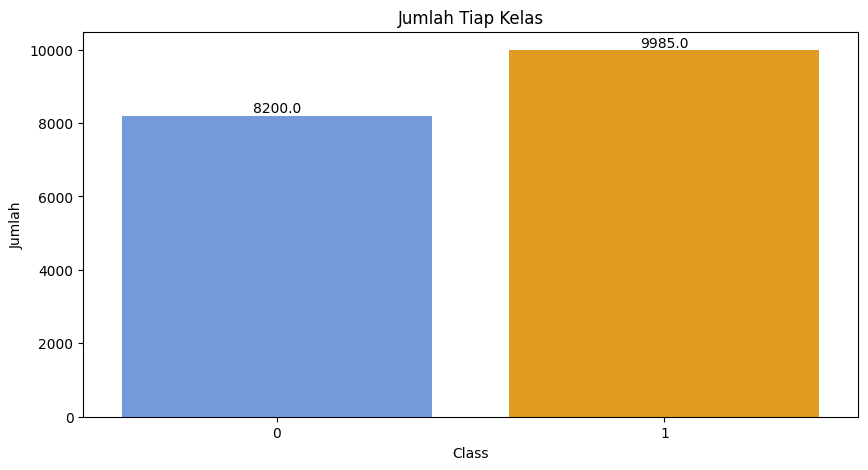

In [ ]:
#barplot
plt.figure(figsize=(10, 5))
#membuat barplot dari jumlah masing-masing kolom 'Class' dengan library seaborn dan warna yang telah ditentukan untuk setiap kelas.
count = sns.countplot(data=df, x='Class', palette=['cornflowerblue', 'orange'])

#menambahkan teks label (angka) diatas setiap bar.
for v in count.patches:
    height = v.get_height()
    plt.text(v.get_x() + v.get_width() / 2, height, f'{height}', ha='center', va='bottom')

plt.title('Jumlah Tiap Kelas')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.show()

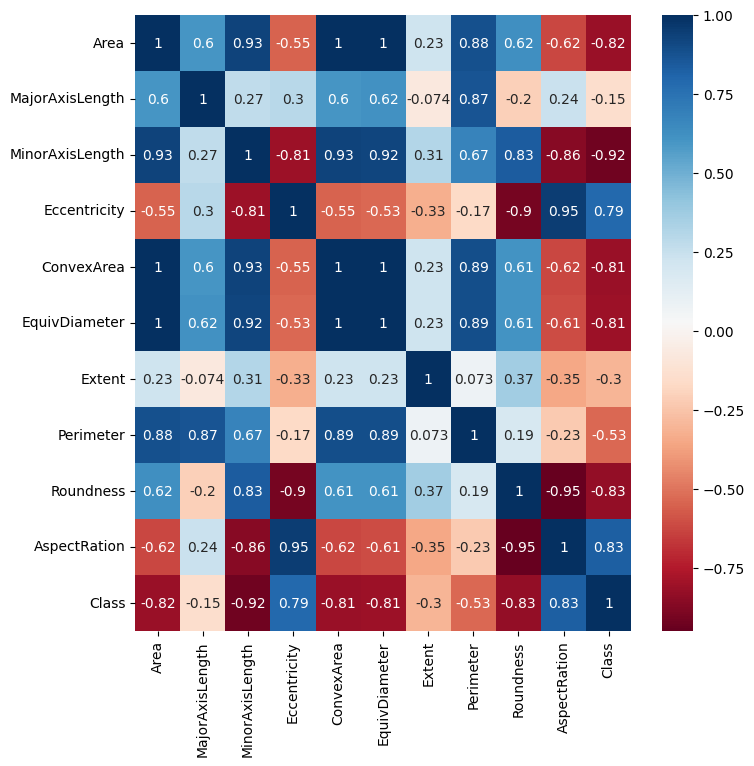

In [ ]:
#menghitung korelasi antar kolom.
corr = df.corr()
#menentukan indeks kolom-kolom untuk heatmap.
corr_features = corr.index
#membuat heatmap dengan library seaborn.
plt.figure(figsize=(8,8))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='RdBu')
plt.show()

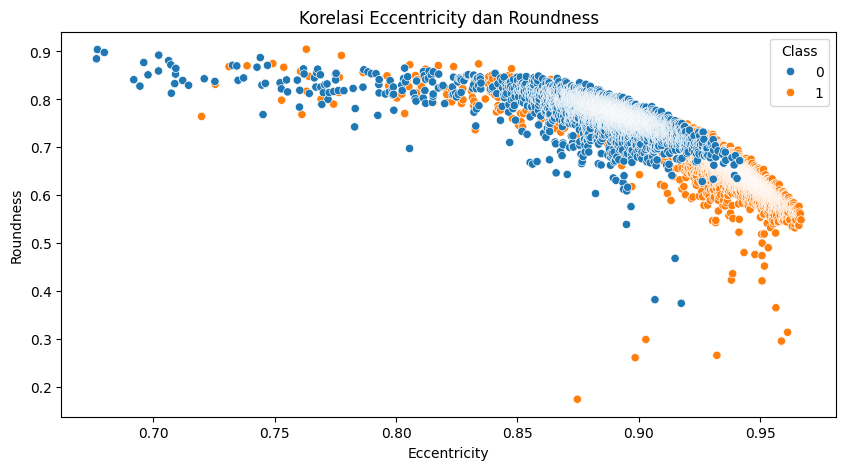

In [ ]:
#scatterplot
plt.figure(figsize=(10, 5))
#membuat scatterplot menggunakan library seaborn.
sns.scatterplot(data=df, x='Eccentricity', y='Roundness', hue='Class')
plt.title('Korelasi Eccentricity dan Roundness')
plt.xlabel('Eccentricity')
plt.ylabel('Roundness')
plt.show()

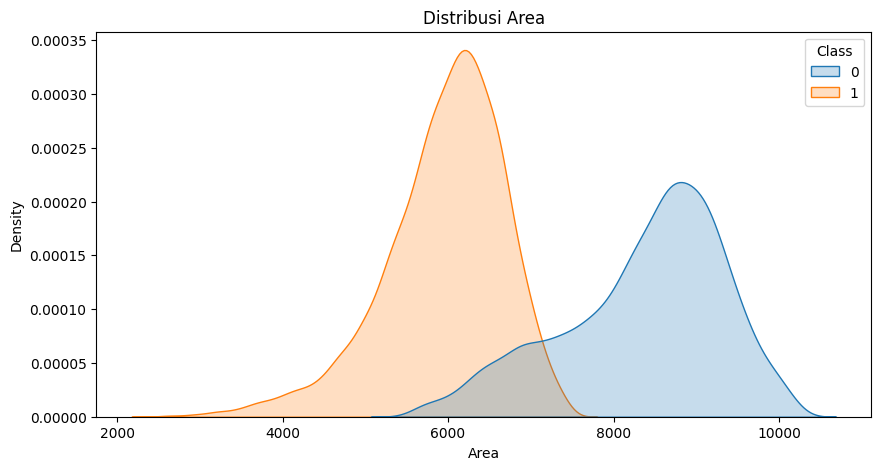

In [ ]:
plt.figure(figsize=(10, 5))
#membuat kde plot dari distribusi kolom 'Area' berdasarkan kelasnya.
#Sintaks `hue='Class'` dapat membedakan distribusi luas daerah biji beras berdasarkan kelasnya
sns.kdeplot(data=df, x='Area', hue='Class', fill=True)
plt.title('Distribusi Area')
plt.xlabel('Area')
plt.show()

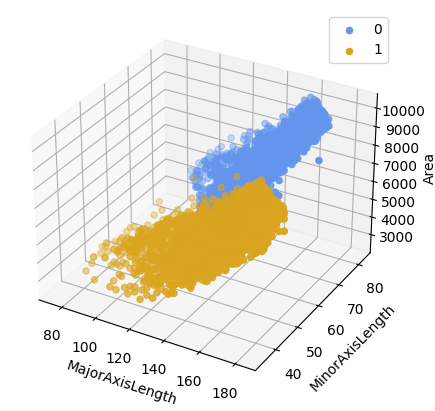

In [ ]:
#membuat 3D scatterplot
fig = plt.figure(figsize=(5, 5))
#menambahkan subplot 3D
ax = fig.add_subplot(111, projection='3d')

#iterasi melalui setiap grup kelas
for class_, group in df.groupby('Class'):
    #mengatur warna berdasarkan kelas
    color = 'cornflowerblue' if class_ == 0 else 'goldenrod'
    ax.scatter(group['MajorAxisLength'], group['MinorAxisLength'], group['Area'], c=color, label=class_)

#memberi label pada sumbu x, y, z
ax.set_xlabel('MajorAxisLength')
ax.set_ylabel('MinorAxisLength')
ax.set_zlabel('Area', rotation=90)

ax.legend()

plt.show()

In [ ]:
#3D scatterplot
#menginisialisasi kolom-kolom dari dataset dan membuat salinan dataset baru.
df_3D = df[['Eccentricity', 'Roundness', 'Perimeter', 'Class']].copy()
#mengonversi kolom 'Class' menjadi tipe data kategori untuk mempermudah visualisasi.
df_3D['Class'] = df_3D['Class'].astype('category')

#membuat scatterplot 3D menggunakan plotly express dengan kolom Eccentricity, Roundness, dan Perimeter sebagai sumbu x, y, dan z berdasarkan kelas 0 (Gonen) dan kelas 1 (Jasmine).
fig = px.scatter_3d(df_3D, x='Eccentricity', y='Roundness', z='Perimeter', color='Class', color_discrete_map = {0: 'cornflowerblue', 1: 'goldenrod'})

fig.show()

## **Pembuatan Model**

### **Splitting Dataset**

In [ ]:
#menginisialisasi variabel x dengan kolom selain kolom 'Class'
x = df.drop("Class", axis=1)
#menginisialisasi variabel y dengan kolom 'Class'
y = df["Class"]

#membagi dataset untuk training dan testing.
#test_size=0.20 berarti 20% dari data akan digunakan untuk testing, sementara 80% lainnya akan digunakan untuk training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#mencetak dimensi dari data train dan test setelah dibagi.
#data train = 14548 row data dan data test = 3637 row data
print("\nSplit dataset:", x_train.shape, x_test.shape, y_train.shape, y_test.shape)


Split dataset: (14548, 10) (3637, 10) (14548,) (3637,)


### **Model Random Forest**

> Algoritma Random Forest akan digunakan untuk memprediksi jenis beras Gonen atau Jasmine. Random Forest membangun sejumlah pohon keputusan dan menggabungkan hasil prediksinya melalui voting. Dengan kata lain, setiap pohon keputusan memiliki suara dalam menentukan kelas yang diprediksi untuk sebuah data, dan kelas yang paling banyak dipilih oleh pohon-pohon keputusan tersebut akan menjadi prediksi akhir dari Random Forest.







In [ ]:
#membuat model Random Forest dengan menggunakan RandomForestClassifier dari library scikit-learn.
#mengatur parameter n_estimators=100 untuk menentukan jumlah pohon keputusan.
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model Random Forest menggunakan data latih (x_train) dan labelnya (y_train) dengan method fit().
model_RF.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#memprediksi Class (y) dari x_test dengan menggunakan model Random Forest.
y_pred_rf = model_RF.predict(x_test)
#mencetak hasil prediksi dalam bentuk array
print(y_pred_rf)

[0 1 0 ... 1 0 0]


In [ ]:
#menggunakan method accuracy_score() untuk melihat akurasi prediksi model.
accuracy = accuracy_score(y_pred_rf, y_test)
accuracy

0.9898267803134452

In [ ]:
#mengonversi array hasil prediksi menjadi DataFrame
rf_pred = pd.DataFrame({'y_prediksi': y_pred_rf})

#menambahkan kolom 'y_asli' yang berasal dari 'y_test' ke dalam DataFrame rf_pred
rf_pred['y_asli'] = y_test.values

#menampilkan DataFrame rf_pred
print(rf_pred)

      y_prediksi  y_asli
0              0       0
1              1       1
2              0       0
3              1       1
4              1       1
...          ...     ...
3632           1       1
3633           1       1
3634           1       1
3635           0       0
3636           0       0

[3637 rows x 2 columns]


### **Uji Model Random Forest dengan Data Baru**

In [ ]:
#memuat file uji baru bernama 'data baru'
df_uji = pd.read_csv('databaru.csv')
df_uji

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
1,6509,141.585627,59.071900,0.908807,6638,91.035796,0.553863,330.562,0.748546,2.396836
2,7556,148.928795,60.588111,0.851089,5031,91.566275,0.541729,300.898,0.701200,2.105476
3,4321,61.519424,55.132452,0.451322,2791,55.194812,0.905318,204.251,0.951314,1.312244
4,5413,100.363175,40.132938,0.676183,4997,71.421896,0.551048,201.571,0.917163,2.481928


In [ ]:
#melakukan prediksi pada data baru dengan model Random Forest
pred = model_RF.predict(df_uji)

#menambahkan hasil prediksi 'Class' ke DataFrame df_uji
df_uji['Class'] = pred

#menambahkan kolom nama jenis beras ke DataFrame df_uji
df_uji['Rice_Classification'] = df_uji['Class'].map({0: 'Gonen', 1: 'Jasmine'})

#menampilkan DataFrame df_uji
print(df_uji)

   Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  3048        76.293164        52.043491      0.731211        3132   
1  6509       141.585627        59.071900      0.908807        6638   
2  7556       148.928795        60.588111      0.851089        5031   
3  4321        61.519424        55.132452      0.451322        2791   
4  5413       100.363175        40.132938      0.676183        4997   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  \
0      62.296341  0.759153    210.012   0.868434      1.465950      1   
1      91.035796  0.553863    330.562   0.748546      2.396836      0   
2      91.566275  0.541729    300.898   0.701200      2.105476      0   
3      55.194812  0.905318    204.251   0.951314      1.312244      1   
4      71.421896  0.551048    201.571   0.917163      2.481928      1   

  Rice_Classification  
0             Jasmine  
1               Gonen  
2               Gonen  
3             Jasmine  
4             



---


* **2105551065 / I Kadek Krisna Apriana Dwi Guna (Kelas A)**

* **2105551052 / Kadek Cahyadi Yogachandra (Kelas A)**

In [ ]:
#input data baru
Area = int(input('Area = '))
MajorAxisLength	= float(input('MajorAxisLength = '))
MinorAxisLength	= float(input('MinorAxisLength = '))
Eccentricity = float(input('Eccentricity = '))
ConvexArea = int(input('ConvexArea = '))
EquivDiameter = float(input('EquivDiameter = '))
Extent = float(input('Extent = '))
Perimeter = float(input('Perimeter = '))
Roundness	= float(input('Roundness = '))
AspectRation = float(input('AspectRation = '))

#membuat array dari input data baru
input_baru = [[Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation]]

#prediksi 'Class' (y) dengan model Random Forest
class_pred = model_RF.predict(input_baru)

if class_pred == 0:
  print('\nBeras Gonen\n')
else:
  print('\nBeras Jasmine\n')

KeyboardInterrupt: Interrupted by user

### **Model KNN**

> Algoritma K-Nearest Neighbors (KNN) akan digunakan untuk memprediksi jenis beras Gonen atau Jasmine. KNN menghitung jarak antara sampel yang ingin diprediksi dengan setiap sampel dalam dataset, dan memilih kelas mayoritas dari tetangga terdekat untuk mengklasifikasikan sampel.

In [ ]:
#membuat model KNN dengan menggunakan KNeighborsClassifier dari library scikit-learn.
#mengatur parameter n_neighbors=3 yang berarti 3 tetangga terdekat akan dijadikan pertimbangan dalam proses klasifikasi.
model_knn = KNeighborsClassifier(n_neighbors=3)

#melatih model KNN menggunakan data latih (x_train) dan labelnya (y_train) dengan method fit().
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#menggunakan method score() untuk melihat akurasi model pada data testing (x_test) dan labelnya (y_test).
model_knn.score(x_test, y_test)

0.9857025020621392